# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [2]:
# usa imread
# comprueba las dimensiones del numpy array

image= imread('ladybug.png')

In [3]:
image.shape

(533, 800, 3)

Muestra la imagen para ver que se ha cargado bien

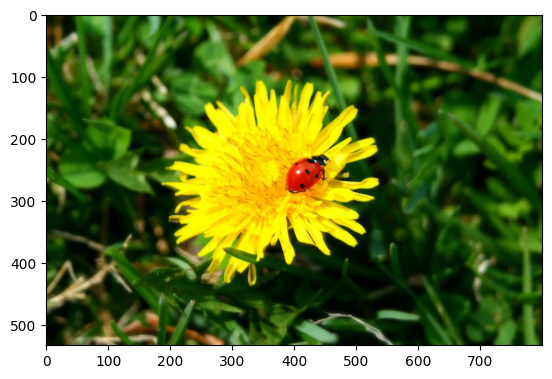

In [4]:
# usa imshow para mostrar la imagen

plt.imshow(image)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [ ]:
# modifica las dimensiones del numpy array 

X = image.reshape(-1, 3) 



array([[0.09803922, 0.11372549, 0.00784314],
       [0.09411765, 0.10980392, 0.00392157],
       [0.09411765, 0.11372549, 0.        ],
       ...,
       [0.03921569, 0.22745098, 0.        ],
       [0.01960784, 0.20392157, 0.        ],
       [0.00784314, 0.1882353 , 0.        ]],
      shape=(426400, 3), dtype=float32)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [9]:

# kmeans con 8 centroides por ejemplo, semilla 42 y 10 repeticiones del kmeans para elegir los centroides que acaban con la mejor inercia
# ajústalo a tus datos

kmeans = KMeans(n_clusters=8, random_state=42,n_init=10).fit(X) 

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [11]:

# usa las etiquetas a los centroides para segmentar la imagen original 

segmented_img = kmeans.cluster_centers_[kmeans.labels_] 

segmented_img

array([[0.02200589, 0.10830343, 0.00568147],
       [0.02200589, 0.10830343, 0.00568147],
       [0.02200589, 0.10830343, 0.00568147],
       ...,
       [0.0956759 , 0.2486936 , 0.01605472],
       [0.0956759 , 0.2486936 , 0.01605472],
       [0.02200589, 0.10830343, 0.00568147]],
      shape=(426400, 3), dtype=float32)

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [12]:

# hay que volver a hacer la imagen rectangular, no una ristra de píxeles 

segmented_img=segmented_img.reshape(image.shape)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

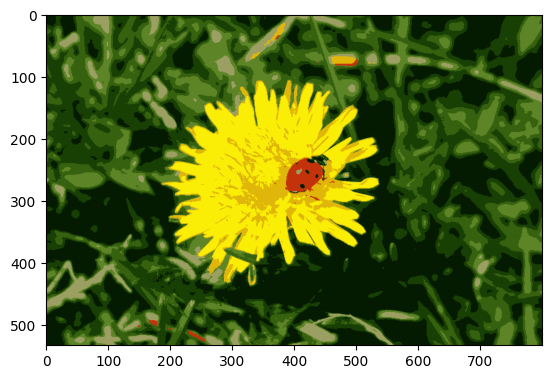

In [13]:
# muestra la imagen modificada

plt.imshow(segmented_img)

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [14]:

        
        
# crea una función que dada una imagen, una cantidad de colores y si se quiere guardar la imagen modificada o solo mostrarla, que siga esos pasos


def create_seg_image (image, n_colors, save=False):
    X=image.reshape(-1,3)
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels]
    segmented_img=segmented_img.reshape(image.shape)
    plt.imshow(segmented_img) 
    if save:
        plt.savefig('mi imagen')
    